# EPL Exploratory Data Analysis Practice Case

## Scenario

Looking back at the season that was 2018-2019 and looking to delve into sight deeper insights. Using the data to see how clubs are similar stylistically, in the way they pass, attack and score goals. This data set is wide ranging in the sense it encompass stats seen on a regular league table but goes beyond looking at how teams pass and keep possession, how they defend, tackle as well as looking at market values of a team and how much money each team was allotted from the TV rights deal.

This data was gathered from:
1. BBC Sports Football,
2. Premierleague.com
3. Transfermarkt.co.uk

Questions
1. Whether this data is clean?
2. How is the point distribution of the epl team? and which team is an anomaly?
3. Which team has the best attack?
4. Which team has the best defence?
5. Which team is good in financial aspect?
6. Explore your creativity!


# Preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Personal Project\Learning on Data Science\IYKRA\4. Statistika\Fellowship-5-main\epl_1819.csv')
df

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,...,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,...,58,63,362,518,0,543,295,4,64.0,89.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,...,76,78,314,610,2,639,317,1,58.8,84.4
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,...,85,73,351,618,2,593,330,2,59.9,87.6
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,...,121,112,326,626,3,770,411,5,56.7,83.2
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,...,133,118,412,609,2,762,404,7,56.1,83.3
5,Manchester United,Europa League,6,27,142512868,38,19,9,10,65,...,122,128,355,581,2,785,370,6,53.3,82.3
6,Wolverhampton,Europa League Qualification,7,15,127165114,38,16,9,13,47,...,100,148,501,720,2,824,464,4,47.4,78.2
7,Everton,No UEFA Competitions,8,18,128603905,38,15,9,14,54,...,94,85,456,700,4,825,430,5,51.0,77.3
8,Leicester,No UEFA Competitions,9,15,123328078,38,15,7,16,51,...,90,96,436,676,4,945,500,5,50.8,79.2
9,West Ham,No UEFA Competitions,10,16,122528663,38,15,7,16,52,...,148,141,457,723,5,855,397,5,49.0,78.7


In [3]:
df.describe()

,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,...,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
count,20.00000,20.000000,2.000000e+01,20.0,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,17.100000,1.228004e+08,38.0,15.450000,7.10000,15.450000,53.600000,53.600000,0.000000,...,1.150000,111.950000,127.750000,429.300000,646.250000,3.200000,429.400000,5.350000,49.995000,78.310000
std,5.91608,6.734827,1.821686e+07,0.0,7.250953,2.44734,6.778255,18.071204,15.752694,32.371202,...,1.136708,24.267099,37.160923,71.058982,65.310493,1.880649,84.536756,2.109502,6.387692,5.866129
min,1.00000,10.000000,9.662886e+07,38.0,3.000000,2.00000,1.000000,22.000000,22.000000,-54.000000,...,0.000000,58.000000,63.000000,314.000000,518.000000,0.000000,246.000000,1.000000,39.100000,63.900000
25%,5.75000,11.750000,1.069409e+08,38.0,10.750000,6.75000,12.250000,44.250000,46.000000,-20.750000,...,0.000000,94.750000,108.000000,364.250000,604.500000,2.000000,390.250000,4.750000,46.300000,75.550000
50%,10.50000,15.000000,1.213295e+08,38.0,14.500000,7.00000,16.000000,51.500000,53.500000,-2.500000,...,1.000000,113.500000,132.000000,434.500000,655.000000,3.500000,445.000000,5.000000,48.350000,78.150000
75%,15.25000,25.000000,1.422731e+08,38.0,19.500000,9.00000,19.250000,63.500000,65.750000,13.750000,...,2.000000,128.500000,147.250000,472.500000,702.500000,4.000000,499.250000,7.000000,54.000000,82.525000
max,20.00000,29.000000,1.524251e+08,38.0,32.000000,12.00000,28.000000,95.000000,81.000000,72.000000,...,3.000000,148.000000,222.000000,548.000000,730.000000,8.000000,564.000000,10.000000,64.000000,89.000000


In [4]:
df.columns.unique()

Index(['Team', 'category', 'general_league_position',
       'finance _live_games_televised', 'finance _tv_revenue',
       'general_matches_played', 'general_won', 'general_draw', 'general_lost',
       'attack_scored', 'defence_goals_conceeded', 'general_goal_difference',
       'general_points', 'general_squad_size', 'general_squad_average_age',
       'general_squad_foreigners', 'finance _team_market',
       'finance _market_average', 'attack_passes', 'attack_passes_through',
       'attack_passes_long', 'attack_passes_back', 'attack_crosses',
       'attack_corners_taken', 'attack_shots', 'attack_shots_on_target',
       'attack_goals_headed', 'attack_goals_penalty', 'attack_goals_box',
       'attack_goals_outsidebox', 'general_card_yellow', 'general_card_red',
       'attack_goals_counter', 'attack_goals_freekick', 'defence_saves',
       'defence_blocks', 'defence_interceptions', 'defence_tackles',
       'defence_tackles_last_man', 'defence_clearances',
       'defence_cleara

# 1. Is the data clean?

Before diving deeper into the data analysis, we need to clean the data first. To answer this, we need to check for duplicates, missing value, and data types.

In [5]:
# First let's check for missing values within the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Team                           20 non-null     object 
 1   category                       20 non-null     object 
 2   general_league_position        20 non-null     int64  
 3   finance _live_games_televised  20 non-null     int64  
 4   finance _tv_revenue            20 non-null     int64  
 5   general_matches_played         20 non-null     int64  
 6   general_won                    20 non-null     int64  
 7   general_draw                   20 non-null     int64  
 8   general_lost                   20 non-null     int64  
 9   attack_scored                  20 non-null     int64  
 10  defence_goals_conceeded        20 non-null     int64  
 11  general_goal_difference        20 non-null     int64  
 12  general_points                 20 non-null     int64

In [6]:
# Check for data duplicates
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
dtype: bool

**Clean slate**
<br> From the results, we can conclude that there are no missing data and duplicated values within the dataset.
<br> Some of the data have different data types. Nevertheless, all of the data that I will be using have the same data type. <br> Therefore, I don't make any changes in data types.

# 2. How is the point distribution of the EPL Team? and which team is an anomaly? 

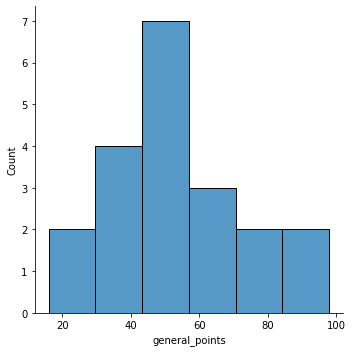

In [7]:
# To check for point distribution, we will be using the histogram
sns.displot(df, x='general_points')

From the visualization, we can see that the data is slightly positively skewed. To confirm this, let's try to calculate its central tendency.

In [8]:
df['general_points'].describe()

count    20.000000
mean     53.450000
std      21.007455
min      16.000000
25%      39.750000
50%      51.000000
75%      67.000000
max      98.000000
Name: general_points, dtype: float64

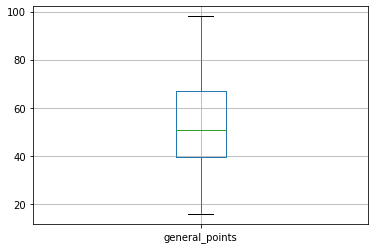

In [9]:
# Let's try using boxplot
boxplot = df.boxplot(column='general_points')

From the looks of it we don't find any strange anomaly. But to be sure let's compute whether there are actuall outliers.

In [10]:
Q1 = df['general_points'].quantile(0.25)
Q3 = df['general_points'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [11]:
outliers = df[df['general_points'] > upper_bound]
outliers

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,...,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy


Given this, we can conclude that there is no team which is an anomaly.

# 3. Which team has the best attack?

To calculate which team has the best attack, I will be using the Attack Strength metric.
Attack Strength is a metric used by football better usually to predict which team will be winning using Poisson Distribution. Usually, people calculate both the Home/Away attack strength for each team.

Nevertheless, given the lack of home/away data, I believe the Attack Strength metric will give us a rough estimates on which team is attack better than the average of the league.

In [12]:
#Calculate Attack Strength
leag_attack_avg = df['attack_scored'].mean()
df['Attack Strength'] = df['attack_scored'] / leag_attack_avg
df[['Team', 'Attack Strength']].sort_values(by=['Attack Strength'], ascending=False).head(1)

,Team,Attack Strength
0,Manchester City,1.772388


From the result we can conclude **Manchester City is the team with best attack.**

However, if we were to visualize the top 5 best attacking team based on Attack Strength:

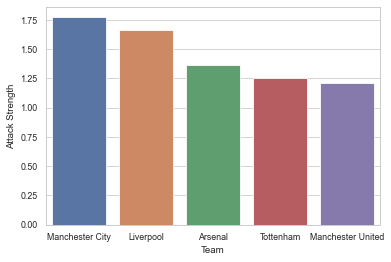

In [23]:
bestatt = df[['Team', 'Attack Strength']].sort_values(by=['Attack Strength'], ascending=False).head(5)
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=1)
tips = sns.load_dataset("tips")
ax = sns.barplot(x="Team", y="Attack Strength", data=bestatt)

# 4. Which team has the best defence?

To calculate which team has the best attack, I will be using the **Defence Strength** metric. This metric is also used by footbal better. The Defence Strength is calculated by dividing the total of goals conceded from each team with the league average.

The lower this coefficient the better is their Defence Strength

In [27]:
# Calculate defence strength
leag_def_avg = df['defence_goals_conceeded'].mean()
df['Defence Strength'] = df['defence_goals_conceeded'] / leag_def_avg
df[['Team', 'Defence Strength']].sort_values(by=['Defence Strength'], ascending=True).head(1)

,Team,Defence Strength
1,Liverpool,0.410448


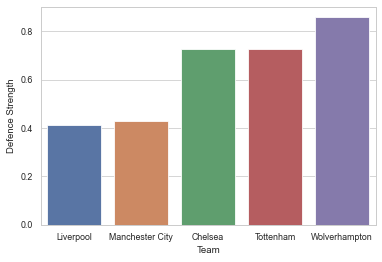

In [26]:
bestdef = df[['Team', 'Defence Strength']].sort_values(by=['Defence Strength'], ascending=True).head(5)
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=1)
tips = sns.load_dataset("tips")
ax = sns.barplot(x="Team", y='Defence Strength', data=bestdef)

# 5. Which team with best finance?

I assume that the team with best finance is the one who have greater total amount of revenue from broadcast and team value.

In [45]:
# Calculate and find the team with best ratio
df['Total_Rev_Team'] = df['finance _team_market'] + df['finance _tv_revenue'] 
df[['Team','Total_Rev_Team']].sort_values(by=['Total_Rev_Team'], ascending=False).head(1).reset_index()

,index,Team,Total_Rev_Team
0,0,Manchester City,1154186355


In [49]:
bestfin = df[['Team', 'Total_Rev_Team']].sort_values(by=['Total_Rev_Team'], ascending=False).head(5)
bestfin

,Team,Total_Rev_Team
0,Manchester City,1154186355
1,Liverpool,988865146
2,Chelsea,925490216
3,Tottenham,880470801
4,Arsenal,843993180


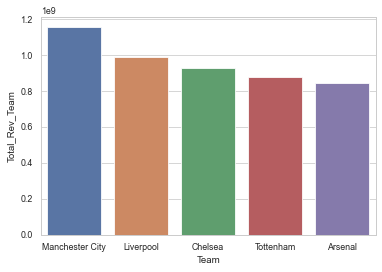

In [50]:
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=1)
tips = sns.load_dataset("tips")
ax = sns.barplot(x="Team", y='Total_Rev_Team', data=bestfin)

# 6. Be Creative

After exploring each aspect of attack, defense, and financial aspect, I would want look further on how each of these variables relate to each other. For that, I will mainly incorporate scatterplot.

<AxesSubplot:xlabel='Attack Strength', ylabel='Total_Rev_Team'>

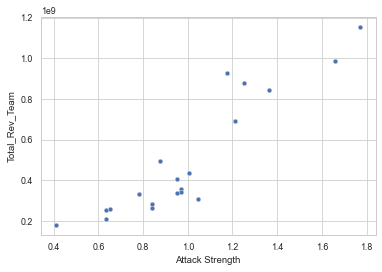

In [51]:
sns.scatterplot(data=df, x="Attack Strength", y="Total_Rev_Team")

<AxesSubplot:xlabel='Defence Strength', ylabel='Total_Rev_Team'>

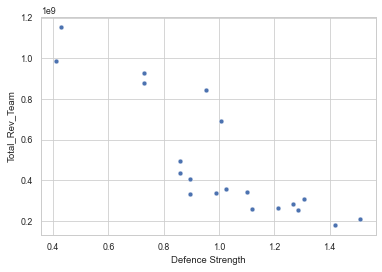

In [52]:
sns.scatterplot(data=df, x="Defence Strength", y="Total_Rev_Team")

From the visualization above, there seems to be a correlation between each Attack and Defence Strenght with Total Revenue. To actually know how big is the correlation, I incorporate the Kendall's Tau given our small sample size.

In [60]:
cortable = df[['Attack Strength', 'Defence Strength', 'Total_Rev_Team']]
cortable.corr(method="kendall")

,Attack Strength,Defence Strength,Total_Rev_Team
Attack Strength,1.000000,-0.552281,0.776640
Defence Strength,-0.552281,1.000000,-0.748034
Total_Rev_Team,0.776640,-0.748034,1.000000


From the results, we can conclude that both Attack and Defence Strength correlate with the Team Revenue.
<br> The Attack Strength positively correlate with Total Team Rev.
<br> The Defence Strength negatively correlate with Total Team Rev.

This means that the **better** the team at **attacking and defending**, **the higher their revenue**.